In [ ]:
  # Recommendation System - Part I
# Product popularity based recommendation system targeted at new customers
# Popularity based are a great strategy to target the new customers with the most popular products sold 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#matplotlibinline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD


In [ ]:
#Loading Dataset values

In [3]:
amazon_ratings = pd.read_csv('./amazon bestseller books.csv')
amazon_ratings = amazon_ratings.dropna() 
#dropna(): This is a method in pandas, It is used to remove missing values from a DataFrame &/or  remove any rows with missing (NaN) values from the DataFrame
amazon_ratings.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [6]:
amazon_ratings.shape
# "shape" indicates that the DataFrame amazon_ratings has 550 rows and 7 columns.

(550, 7)

In [8]:
popular_books = pd.DataFrame(amazon_ratings.groupby('Name')['User Rating'].count())
# creating a new Dataframe, with 'Name' as  column and 'User Rating' This part selects the 'User Rating' column from each group.It's counting the number of ratings for each product.
most_popular_books = popular_books.sort_values('User Rating', ascending = False)
most_popular_books.head(15)

,User Rating
Name,
"Publication Manual of the American Psychological Association, 6th Edition",10
StrengthsFinder 2.0,9
"Oh, the Places You'll Go!",8
The Very Hungry Caterpillar,7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change,7
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book),6
Jesus Calling: Enjoying Peace in His Presence (with Scripture References),6
The Official SAT Study Guide,5
To Kill a Mockingbird,5


<Axes: xlabel='Name'>

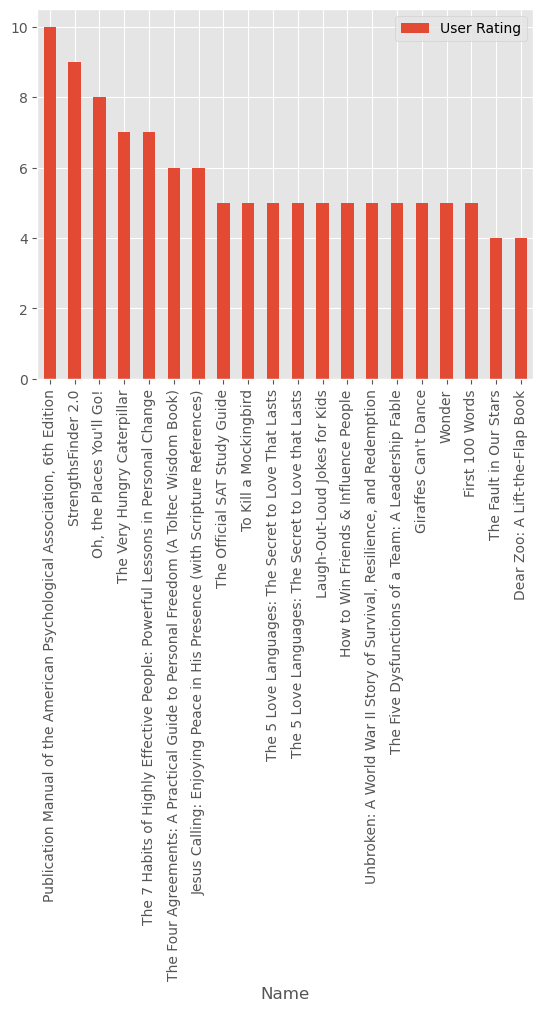

In [9]:
most_popular_books.head(20).plot(kind = "bar")

In [ ]:
# Analysis:

 The above graph gives us the most popular products (arranged in descending order) sold by the business.

# For eaxmple, product, book ( #Publication Manual of the American Psychological Association, 6th Edition) has sales of over 10, the next most popular product, (StrengthsFinder 2.0) has sales of 9, etc

In [ ]:
 Recommendation System Part 2
Model-based collaborative filtering system:
Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.

In [10]:
# Subset of Amazon User Ratings
amazon_ratings1 = amazon_ratings.head(350)

In [ ]:
This utility matrix is often used in recommendation systems.
pivot_table method on the DataFrame amazon_ratings1. This method is used to reshape and transform data.
fill_value=0: Specifies that missing values (NaN) in the pivot table should be filled with 0.

In [12]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='User Rating',index='Name',columns='Reviews',fill_value=0)
ratings_utility_matrix.head()

Reviews,37,220,408,460,471,491,548,615,637,720,...,25706,26741,27098,28729,29651,35799,36348,47265,57271,61133
Name,,,,,,,,,,,,,,,,,,,,,
10-Day Green Smoothie Cleanse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
11/22/63: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
12 Rules for Life: An Antidote to Chaos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1984 (Signet Classics),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
"5,000 Awesome Facts (About Everything!) (National Geographic Kids)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [ ]:
As expected, the utility matrix obtaned above is sparce, I have filled up the unknown values wth 0.

In [13]:
ratings_utility_matrix.shape

(230, 230)

In [16]:
#Transposing the matrix,Transposing a matrix means swapping its rows with columns and vice versa.

Transpose = ratings_utility_matrix.T
Transpose.head()

Name,10-Day Green Smoothie Cleanse,11/22/63: A Novel,12 Rules for Life: An Antidote to Chaos,1984 (Signet Classics),"5,000 Awesome Facts (About Everything!) (National Geographic Kids)",A Dance with Dragons (A Song of Ice and Fire),A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons,A Gentleman in Moscow: A Novel,"A Higher Loyalty: Truth, Lies, and Leadership",A Man Called Ove: A Novel,...,The Alchemist,The Amateur,The Art of Racing in the Rain: A Novel,The Big Short: Inside the Doomsday Machine,"The Blood Sugar Solution: The UltraHealthy Program for Losing Weight, Preventing Disease, and Feeling Great Now!",The Blood of Olympus (The Heroes of Olympus (5)),"The Body Keeps the Score: Brain, Mind, and Body in the Healing of Trauma",The Book Thief,The Book of Basketball: The NBA According to The Sports Guy,The Book with No Pictures
Reviews,,,,,,,,,,,,,,,,,,,,,
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
